# Datamining on Student performance dataset (Dataset: Performance in subject maths)

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = pd.read_excel('student-mat.xlsx')

### Goal of Exploratory Data Analysis: is to find the factors which effect the student grades

In [25]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Data preperation

In [26]:
col = data.columns

In [27]:
col

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'G1', u'G2', u'G3'],
      dtype='object')

In [28]:
s=pd.get_dummies('school')

In [29]:
data.dtypes  #to check the datatype of the attributes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [30]:
data['Pstatus'].unique()

array([u'A', u'T'], dtype=object)

In [31]:
#converting to numerical values
data['school'] =  data['school'].map({'GP': 1, 'MS': 0})
data['sex'] =  data['sex'].map({'F': 1, 'M': 0})
data['address'] =  data['address'].map({'U': 1, 'R': 0})
data['famsize'] =  data['famsize'].map({'LE3': 1, 'GT3': 0})
data['Pstatus'] =  data['Pstatus'].map({'T': 1, 'A': 0})
data['Mjob'] =  data['Mjob'].map({'at_home': 0, 'health': 1,'other':2,'services':3,'teacher':4})

In [32]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,0,0,4,4,0,teacher,...,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,0,1,1,1,0,other,...,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,1,1,1,1,0,other,...,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,0,1,4,2,1,services,...,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,0,1,3,3,2,other,...,4,3,2,1,2,5,4,6,10,10


In [33]:
data['Fjob'].unique()
data['reason'].unique()
data['guardian'].unique()

array([u'mother', u'father', u'other'], dtype=object)

In [34]:
data['Fjob'] =  data['Fjob'].map({'at_home': 0, 'health': 1,'other':2,'services':3,'teacher':4})
data['reason'] =  data['reason'].map({'course': 0, 'other': 1,'home':2,'reputation':3})
data['guardian'] =  data['guardian'].map({'mother': 0, 'father': 1,'other':2})

In [35]:
data.iloc[:,9:].head()

,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,4,0,0,2,2,0,yes,no,no,no,...,4,3,4,1,1,3,6,5,6,6
1,2,0,1,1,2,0,no,yes,no,no,...,5,3,3,1,1,3,4,5,5,6
2,2,1,0,1,2,3,yes,no,yes,no,...,4,3,2,2,3,3,10,7,8,10
3,3,2,0,1,3,0,no,yes,yes,yes,...,3,2,2,1,1,5,2,15,14,15
4,2,2,1,1,2,0,no,yes,yes,no,...,4,3,2,1,2,5,4,6,10,10


In [36]:
data.iloc[:,17:].head()

,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [37]:
data['schoolsup'].unique()
data['activities'].unique()

array([u'no', u'yes'], dtype=object)

In [38]:
data['schoolsup'] =  data['schoolsup'].map({'yes': 1, 'no': 0})
data['famsup'] =  data['famsup'].map({'yes': 1, 'no': 0})
data['paid'] =  data['paid'].map({'yes': 1, 'no': 0})
data['activities'] =  data['activities'].map({'yes': 1, 'no': 0})
# data['activities'] =  data['activities'].map({'yes': 1, 'no': 0})
data['nursery'] =  data['nursery'].map({'yes': 1, 'no': 0})
data['higher'] =  data['higher'].map({'yes': 1, 'no': 0})
data['internet'] =  data['internet'].map({'yes': 1, 'no': 0})
data['romantic'] =  data['romantic'].map({'yes': 1, 'no': 0})


In [39]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [40]:
data['school'].isnull().sum()

0

In [41]:
#to check if there are null values
data[col].isnull().sum() 

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [42]:
data[['schoolsup','famsup', 'paid', 'activities']].head()

,schoolsup,famsup,paid,activities
0,1,0,0,0
1,0,1,0,0
2,1,0,1,0
3,0,1,1,1
4,0,1,1,0


In [51]:
correlation=data[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid','G1','G2','G3']]
cor = correlation.corr()
# float(cor, 2)

### Knowledge: If a student is getting good grade in the first period then the syudent will get good grades in other periods as well

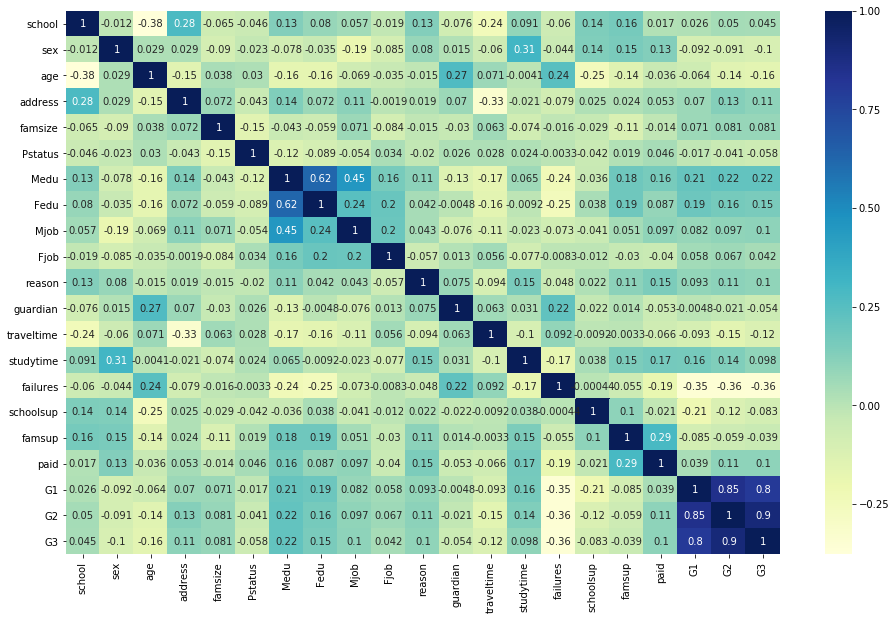

<Figure size 432x288 with 0 Axes>

In [67]:
# Correlation Matrix analysis
# figure size
plt.figure(figsize=(16,10))

# heatmap
# drew a correlation matrix
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()
plt.savefig("stu-mat-all.png")

### Knowledge: Consuming alcohol in weekend and weekday merely affects the grades and they are correlated with each other with 65% correlation means if someone is drinking alcohol in weekday then he or she possibly going  to drink on weekend also.

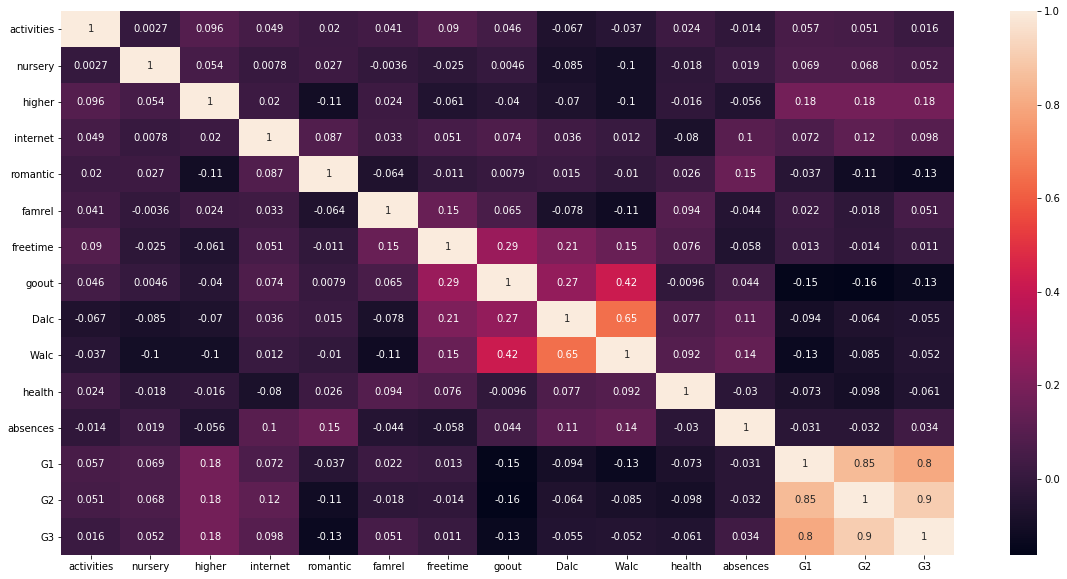

In [68]:
fig_df = data[['activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]

# fig_df.drop(['mobile_number','churn'],axis=1,inplace=True)
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(fig_df.corr(),annot = True)
plt.savefig("stu-mat-cols_df.png")

### Knowledge: Mother Education and  Father Education are positively correlated by 62% which means if father is educated then mother is also likely to be educated 

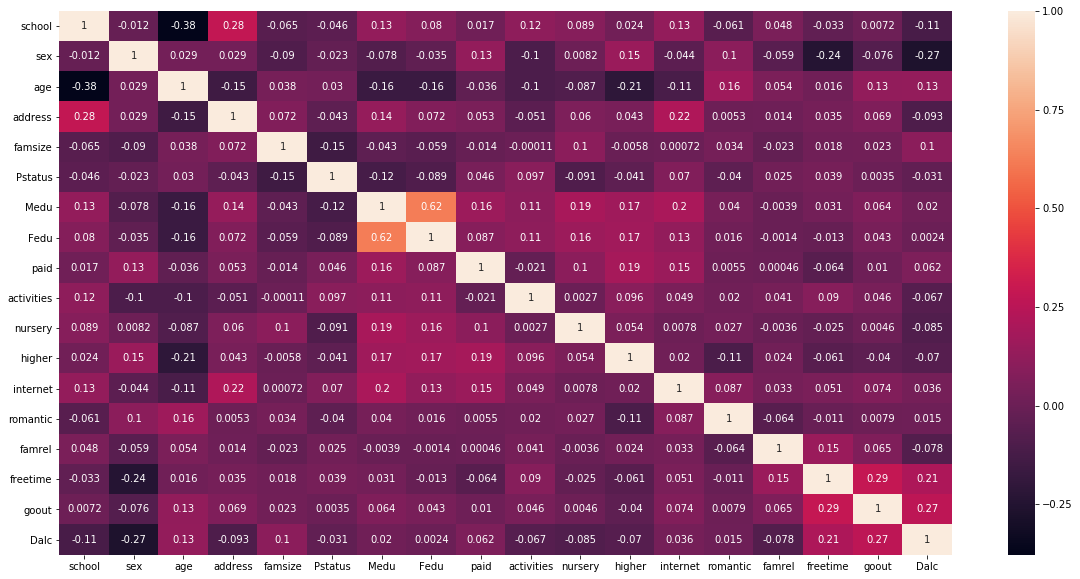

In [69]:
fig_df = data[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc']]

# fig_df.drop(['mobile_number','churn'],axis=1,inplace=True)
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(fig_df.corr(),annot = True)
plt.savefig("stu-mat-cols_df2.png")

### Knowledge: Marks does not have any kind of effect on drinking alcohol or health (as the points are distributed more or less uniformly), while absences and G1, G2, and G3 are related.

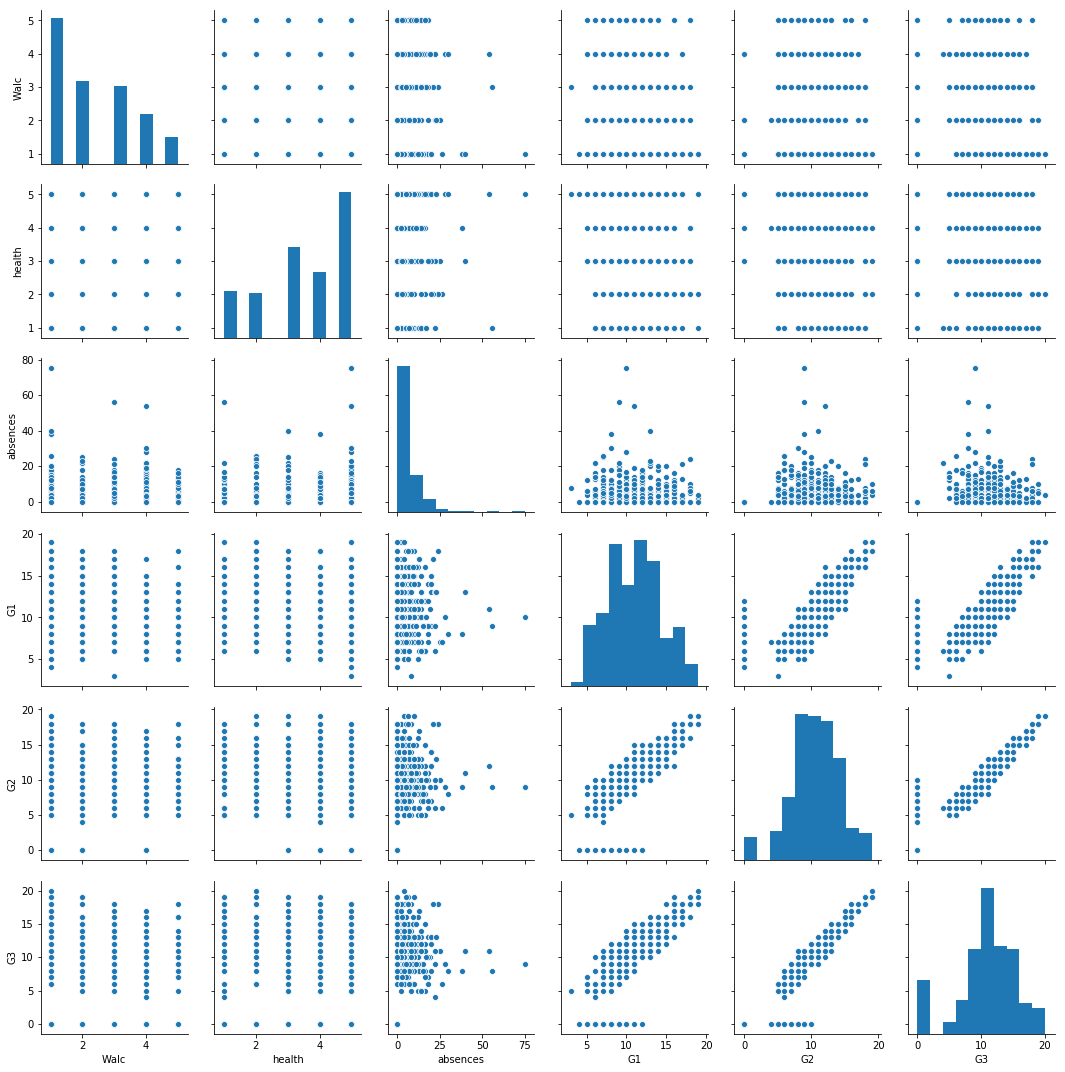

<Figure size 432x288 with 0 Axes>

In [70]:

sns.pairplot(data[['Walc', 'health', 'absences', 'G1', 'G2', 'G3']])
plt.show()
plt.savefig("stu-mat-cols_df3.png")

### Knowledge: education of mother and father are not related to drinking of alcohol

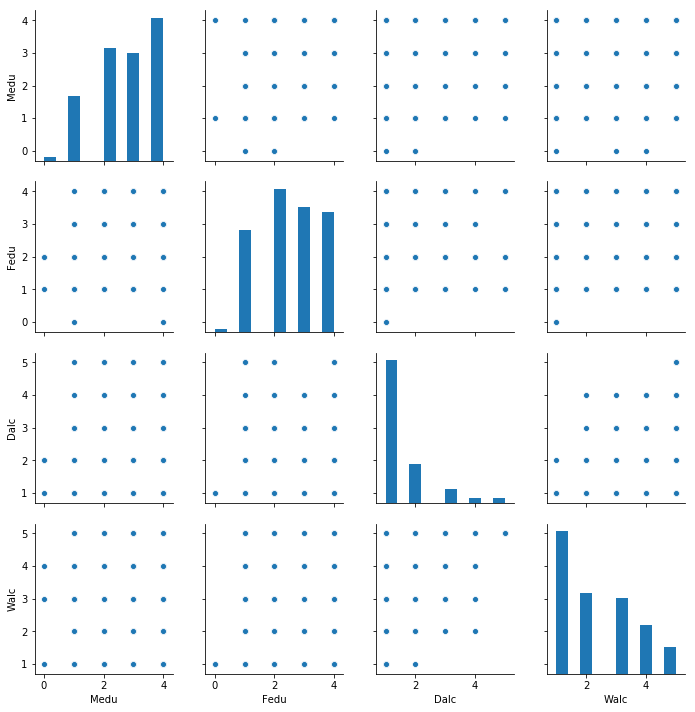

In [57]:
sns.pairplot(data[['Medu', 'Fedu', 'Dalc','Walc']])
plt.show()

In [58]:
#normalisation of data
normalized_df=(data- data.min())/(data.max()-data.min())

In [59]:
normalized_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.0,1.0,0.428571,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.75,0.50,0.75,0.00,0.00,0.50,0.080000,0.1250,0.315789,0.30
1,1.0,1.0,0.285714,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,1.00,0.50,0.50,0.00,0.00,0.50,0.053333,0.1250,0.263158,0.30
2,1.0,1.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,0.75,0.50,0.25,0.25,0.50,0.50,0.133333,0.2500,0.421053,0.50
3,1.0,1.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,0.50,0.25,0.25,0.00,0.00,1.00,0.026667,0.7500,0.736842,0.75
4,1.0,1.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.75,0.50,0.25,0.00,0.25,1.00,0.053333,0.1875,0.526316,0.50
5,1.0,0.0,0.142857,1.0,1.0,1.0,1.00,0.75,0.75,0.50,...,1.00,0.75,0.25,0.00,0.25,1.00,0.133333,0.7500,0.789474,0.75
6,1.0,0.0,0.142857,1.0,1.0,1.0,0.50,0.50,0.50,0.50,...,0.75,0.75,0.75,0.00,0.00,0.50,0.000000,0.5625,0.631579,0.55
7,1.0,1.0,0.285714,1.0,0.0,0.0,1.00,1.00,0.50,1.00,...,0.75,0.00,0.75,0.00,0.00,0.00,0.080000,0.1875,0.263158,0.30
8,1.0,0.0,0.000000,1.0,1.0,0.0,0.75,0.50,0.75,0.50,...,0.75,0.25,0.25,0.00,0.00,0.00,0.000000,0.8125,0.947368,0.95
9,1.0,0.0,0.000000,1.0,0.0,1.0,0.75,1.00,0.50,0.50,...,1.00,1.00,0.00,0.00,0.00,1.00,0.000000,0.6875,0.789474,0.75


### Observation: Normalization does not effect this dataset

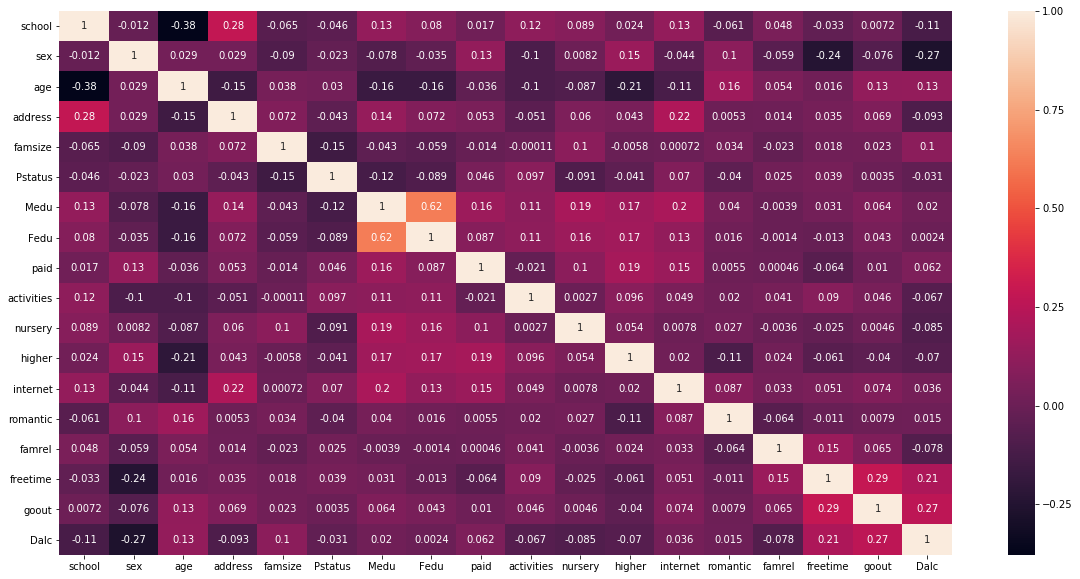

In [71]:
fig_df = normalized_df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc']]

# fig_df.drop(['mobile_number','churn'],axis=1,inplace=True)
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(fig_df.corr(),annot = True)
plt.savefig("stu-mat-cols_df4.png")

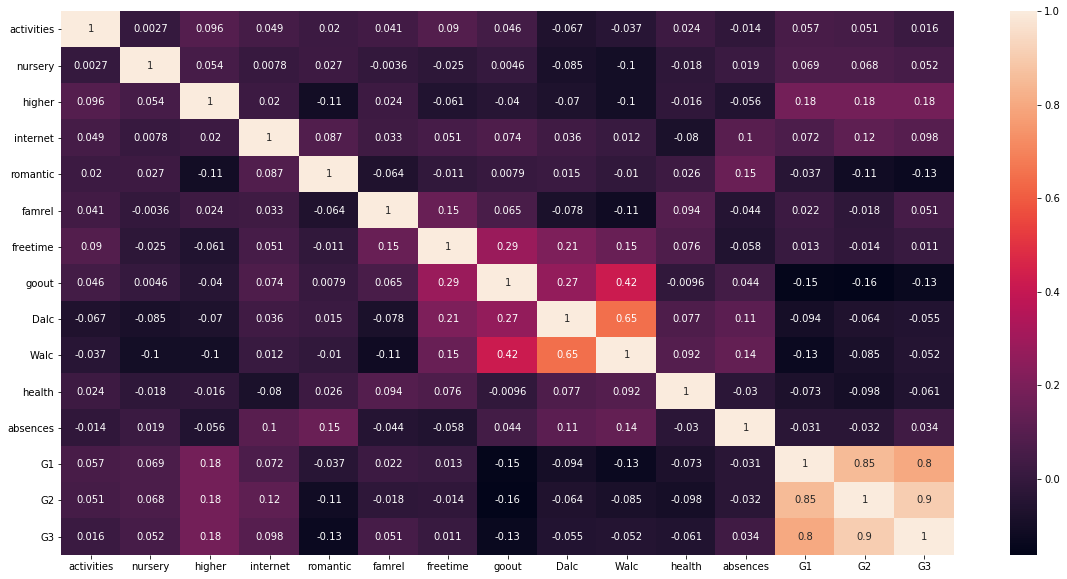

In [72]:
fig_df = normalized_df[['activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]

# fig_df.drop(['mobile_number','churn'],axis=1,inplace=True)
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(fig_df.corr(),annot = True)
plt.savefig("stu-mat-cols_df5.png")

In [66]:
# map = pd.read_csv('mapping.csv')
aggregate = data.groupby('Dalc')
m= aggregate['studytime'].mean()
m.sort_values(ascending=False)

Dalc
1    2.144928
2    1.880000
4    1.777778
5    1.666667
3    1.538462
Name: studytime, dtype: float64

### Knowledge: The bar plots show that for G1 first periods more people are scoring good marks in as median is towards max marks. While in G2 and G3  most of the students are scoring marks  near mean marks of the class.

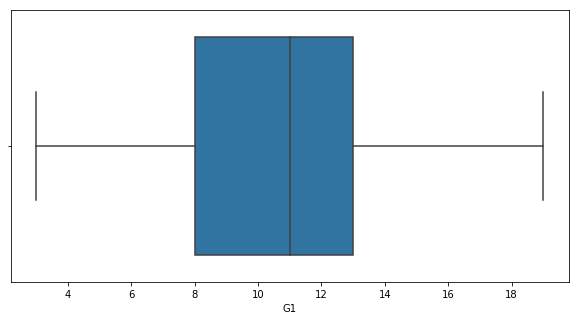

<Figure size 432x288 with 0 Axes>

In [73]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))        # Size of the figure
sns.boxplot(data.G1) 
plt.show()
plt.savefig("stu-mat-bar1.png")

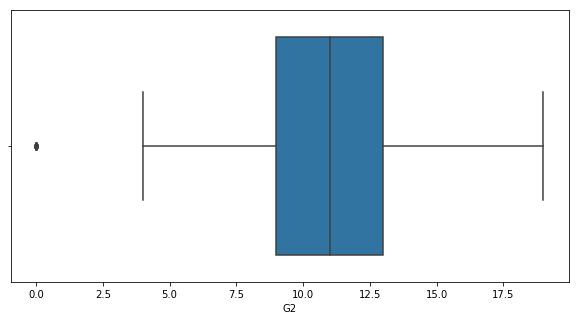

<Figure size 432x288 with 0 Axes>

In [74]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))        # Size of the figure
sns.boxplot(data.G2) 
plt.show()
plt.savefig("stu-mat-bar2.png")

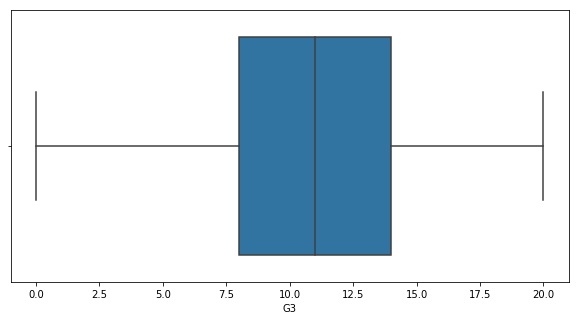

<Figure size 432x288 with 0 Axes>

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))        # Size of the figure
sns.boxplot(data.G3) 
plt.show()
plt.savefig("stu-mat-bar3.png")